<a href="https://colab.research.google.com/github/Joan-Njoki-Mwangi/Blinkit-Grocery-Store-Deep-Dive/blob/main/Blinkit_Grocery_Store_Deep_Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Blinkit Analysis Overview**

This project explores the Blinkit Grocery dataset, which is made up of five interconnected datasets:

* Stock levels – daily product availability

* Sales – order details including quantities and prices

* Delivery times – promised vs. actual delivery performance

* Marketing strategies and performance

* Customers – retention, churn, and purchasing behavior

 **Objectives**

* Analyze market performance — identify thriving vs potential markets.

* Examine operational efficiency — stockouts, delivery delays, and order fulfillment.

* Explore sales trends — revenue, demand patterns, and seasonality.

* Investigate customer churn — find leading drivers and predict churn risk.

**Tools & Workflow**


 Tools and Technologies: Python for advanced analysis and modeling, and Tableau for visualization


### *Importing libraries*

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.dates as mdates


## 1.Customer segmentation & behavior

In [3]:
# uploading the datasource
customer_seg = pd.read_csv("/content/drive/MyDrive/Blinkit datastores/blinkit_customers.csv")

## *Data Exploration*

In [4]:
# previewing five random rows
customer_seg.sample(5)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
1072,83348353,Eta Dutt,fradorai@example.org,918182015528,"51/76, Hari Nagar\nNandyal-125693",Gurgaon,447354,2024-08-23,Inactive,1,533.72
707,34853377,William Dutta,ktandon@example.net,918007533944,"H.No. 165\nMadan Zila, Ambarnath 801685",Nanded,986269,2023-06-04,Premium,8,732.53
48,88130777,Darsh Gupta,xdash@example.org,918488103744,"508\nBrar Path, Machilipatnam 589416",North Dumdum,424291,2023-10-17,New,16,301.23
533,88532418,Ansh Bahl,bina13@example.com,913215442494,"546\nDevi, Bardhaman-527064",Gorakhpur,13574,2024-10-21,New,12,344.66
1403,91973128,Advik Hayre,guneetwable@example.com,912754727801,"78, Deshmukh Road, Gulbarga 580534",Karnal,645358,2024-07-01,Premium,15,989.80


In [5]:
customer_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [6]:
#converting registration_date into datetime format
customer_seg['registration_date'] = pd.to_datetime(customer_seg['registration_date'])


-The dataset contains no null values, the columns in the correct data types, and the column names clearly defined.

## *Key insights*

In [7]:
# descriptive statistics
customer_seg.describe()

,customer_id,phone,pincode,registration_date,total_orders,avg_order_value
count,2.500000e+03,2.500000e+03,2500.000000,2500,2500.000000,2500.000000
mean,4.989961e+07,9.150532e+11,497653.183200,2024-01-15 18:06:20.160000,10.491600,1102.375836
min,3.181300e+04,9.100132e+11,666.000000,2023-03-16 00:00:00,1.000000,200.430000
25%,2.402443e+07,9.125946e+11,257079.750000,2023-08-21 18:00:00,6.000000,631.817500
50%,5.000044e+07,9.150236e+11,498662.000000,2024-01-22 12:00:00,10.000000,1118.650000
75%,7.595459e+07,9.176256e+11,740668.000000,2024-06-12 06:00:00,16.000000,1565.400000
max,9.989390e+07,9.199988e+11,999631.000000,2024-11-04 00:00:00,20.000000,1999.830000
std,2.919266e+07,2.882835e+09,281167.293249,NaN,5.805533,523.043183


### *Registrations*

In [8]:
customer_seg.registration_date=customer_seg['registration_date'].dt.to_period('D')

In [9]:
date_counts = customer_seg['registration_date'].value_counts()

# Identify the most occurring date and its frequency

most_occurring_date = date_counts.idxmax()
frequency = date_counts.max()

for date, count in date_counts.items():
    if count == frequency:
        print(f"The peak registration date was {date}, with a total of {count} registrations.")



The peak registration date was 2024-04-22, with a total of 10 registrations.
The peak registration date was 2024-06-23, with a total of 10 registrations.
The peak registration date was 2024-03-10, with a total of 10 registrations.
The peak registration date was 2024-10-03, with a total of 10 registrations.
The peak registration date was 2024-03-18, with a total of 10 registrations.


> Registrations cover the period from March 16, 2023, to November 4, 2024, with the majority occurring in 2024. Notably, March 10, March 18, April 22, June 23, and October 10 had the highest records at 10 registrations.

> The highest total number of orders per customer recorded is 20, while the majority of customers placed around 10 orders, with a variation of approximately ±5.8 standard deviations from the mean of approximately 10 orders. Notably, all registered customers placed at least one order.

> The average order value stands at 1,118.65, with a dispersion of about ± 523.04 around the mean, providing key insight into customer spending behavior

### *Area*

In [10]:
# creating a column of the highest spend using the average order value and total orders done
customer_seg['total_spent'] = customer_seg.total_orders * customer_seg.avg_order_value


In [11]:
# based on area
#area with the highest orders, could mean that it has the highest reach in terms of market penetration
# area with the highest order value

High_spending_areas = (
    customer_seg.groupby('area').agg(
        total_orders = ('total_orders','sum'),
        total_sales = ('total_spent','sum'),
        avg_spend = ('avg_order_value','mean'),
        num_customers = ('customer_id','nunique')
    ).sort_values(by='total_sales',ascending = False).head(10))

Least_spending_areas = (
    customer_seg.groupby('area').agg(
        total_orders = ('total_orders','sum'),
        total_sales = ('total_spent','sum'),
         avg_spend = ('avg_order_value','mean'),
        num_customers = ('customer_id','nunique')
    ).sort_values(by='total_sales',ascending = True).head(10))

print("Top 10 High Spending Areas:\n", High_spending_areas, "\n")
print("Bottom 10  Spending Areas:\n", Least_spending_areas)


Top 10 High Spending Areas:
              total_orders  total_sales    avg_spend  num_customers
area                                                              
Deoghar               200    232826.09  1139.368235             17
Orai                  190    229979.58  1116.716471             17
Chittoor              163    216974.06  1182.904615             13
Korba                 160    207739.78  1147.996923             13
Jalna                 175    203583.78  1273.023889             18
Burhanpur             159    201574.71  1289.944167             12
Bathinda              168    198542.49  1136.222941             17
Nandyal               162    188903.73  1167.437857             14
Bhagalpur             145    188006.04  1277.073636             11
Bulandshahr           150    180392.90  1269.042308             13 

Bottom 10  Spending Areas:
                 total_orders  total_sales    avg_spend  num_customers
area                                                               

**Insights from Area-Wise Spending (2023–2024)**

**High Performing Areas**

Deoghar recorded the highest total spend at 232,826, making it a stronghold in terms of revenue contribution.

Jalna stands out with the highest customer base (18 unique customers), each spending an average of 1,273.

> This suggests that Jalna offers both depth (volume of customers) and quality (above-average spend).

> It may be a strategic market for expansion/penetration given its strong customer engagement and spending levels above the 50th percentile of price dispersion.

**Emerging/Undervalued Areas**

Nashik, though listed among the bottom-10 areas by total sales, shows a notable average spend of 1,154 across just 4 customers.

This indicates that while the market is small in size, the existing customer base is relatively high-value.

> With proper outreach, customer acquisition in Nashik could unlock untapped revenue potential.

**Low Performing Areas (High Risk/Low Value)**

Areas like Mangalore, Muzaffarpur, and Srikakulam show very low average spend per customer (330–667) combined with small customer bases (1–4 customers).

> These locations may not currently justify aggressive investment, unless future campaigns indicate a potentially higher demand.

Strategic Takeaways

Deoghar = Revenue powerhouse (retain & strengthen).

Jalna = High-penetration, high-value — good for targeted promotions/loyalty programs.

Nashik = Small but promising — opportunity for customer acquisition.

Mangalore, Muzaffarpur, Srikakulam = Low ROI zones; require cost-benefit analysis before further investment.



### *Trends* over time:
*   Customer base; number of customers and registrations
*   Avg order value
*   Total orders
*   Total spending



In [12]:
customer_seg['Month'] = customer_seg['registration_date'].dt.to_timestamp().dt.to_period('M')
df = customer_seg[(customer_seg.Month > "2023-03") & (customer_seg.Month < "2024-11")]


In [13]:
# creating the table to show trends over time
customer_base = df.groupby('Month').agg(
    num_customers = ('customer_id','nunique'),
    avg_order_value = ('avg_order_value','mean'),
    volume_of_orders = ('total_orders','sum'),
    total_spending = ('total_spent','sum'),
    avg_num_orders = ('total_orders','mean'),
    count_date = ('registration_date','nunique')
).sort_values(by='Month')
customer_base

,num_customers,avg_order_value,volume_of_orders,total_spending,avg_num_orders,count_date
Month,,,,,,
2023-04,120,1115.539667,1212,1351797.21,10.100000,30
2023-05,108,1148.729907,1068,1248722.07,9.888889,30
2023-06,110,1040.531909,1094,1081048.25,9.945455,29
2023-07,114,1167.766316,1334,1557676.33,11.701754,29
2023-08,142,1072.427676,1427,1539585.96,10.049296,31
2023-09,115,1066.398957,1205,1316347.90,10.478261,30
2023-10,127,1045.316299,1473,1555834.29,11.598425,30
2023-11,144,1117.789514,1544,1706105.01,10.722222,30
2023-12,109,1121.523211,1215,1405702.83,11.146789,31


*Having established a baseline with key data points, including average spend, total sales generated, order volumes (both average and total), and the number of customers — the analysis will explore the following:*

**Sales vs. Volume Trends**: How have total sales trended against order volumes over time? Do the patterns suggest seasonality or are they driven by one-time purchases?

**Customer Growth and Segmentation**: Has the number of registered customers grown over time? What are the distinct trends across different segments (premium, new, inactive)?

**Average Order Value vs. Customer Acquisition**: How does the average order value relate to the number of registered customers? Does lower pricing correlate with more customer registrations?

**Price Elasticity**: Does price elasticity hold true in this dataset? Specifically, does lower pricing correspond with a higher volume of orders?

### i) Sales vs Voume Trends

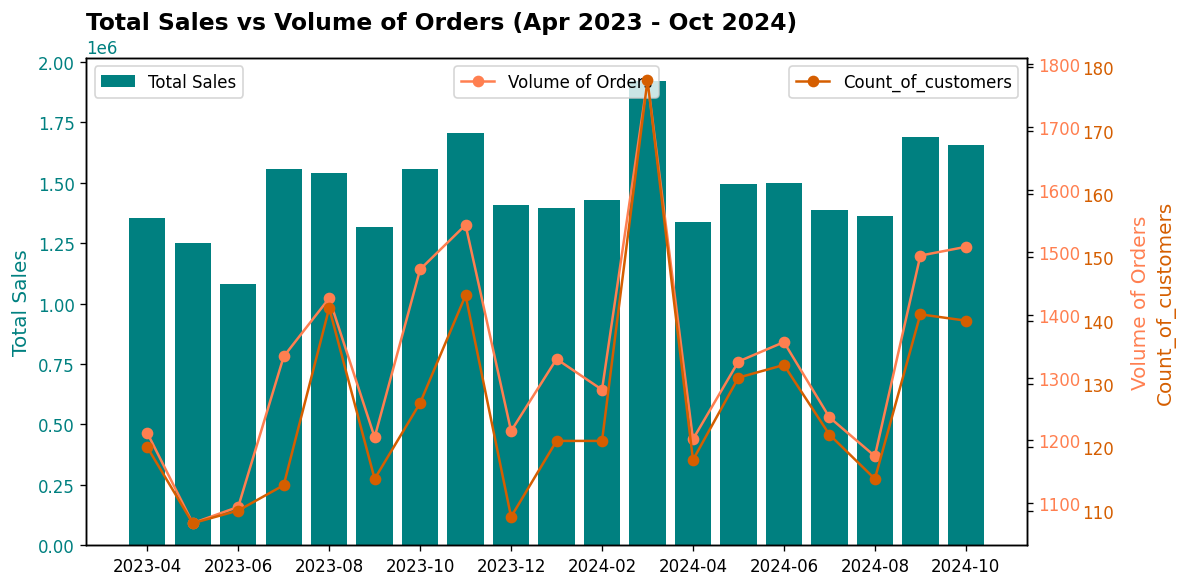

In [14]:

# Exclude March 2023 and Nov 2024
cust_base_excl = customer_base.copy()
# Create figure and axis
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 120  # sharper text

fig, ax1 = plt.subplots()

# Bars for spending
ax1.bar(cust_base_excl.index.astype(str), cust_base_excl["total_spending"],
        color="teal", label="Total Sales")

ax1.set_ylabel("Total Sales", color="teal", fontsize=12)
ax1.tick_params(axis="y", labelcolor="teal")

# Secondary axis with line
ax2 = ax1.twinx()
ax2.plot(cust_base_excl.index.astype(str), cust_base_excl["volume_of_orders"],
         color="coral", marker="o", label="Volume of Orders")

ax2.set_ylabel("Volume of Orders", color="coral", fontsize=12, labelpad = 30)
ax2.tick_params(axis="y", labelcolor="coral")

# Secondary axis with line
ax3 = ax1.twinx()
ax3.plot(cust_base_excl.index.astype(str), cust_base_excl["num_customers"],
         color="#D55E00", marker="o", label="Count_of_customers")

ax3.set_ylabel("Count_of_customers", color="#D55E00", fontsize=12, labelpad=25)
ax3.tick_params(axis="y", labelcolor="#D55E00",pad = 30)


# Fix xticks
plt.xticks(rotation=45, ha="right")
ax1.set_xticks(range(0, len(cust_base_excl.index), 2))  # show every 2nd month

plt.title("Total Sales vs Volume of Orders (Apr 2023 - Oct 2024)", fontsize=14,fontweight = 'bold',loc = 'left')
ax1.legend(loc="upper left")
ax2.legend(loc="upper center")
ax3.legend(loc="upper right")
plt.tight_layout()
plt.show()

* At a glance, a comparison of the yearly trends for 2023 and 2024 shows that **March 2024 recorded the highest sales**, with 2024 exceeding 125,000 showing a better performance than 2023.

* The data also suggests a clear correlation between the number of customers and the volume of orders more customers generally drive higher order volumes, which in turn lead to greater sales.

* However, certain months **deviate** from this pattern. For example, **June
2023, December 2023, and August 2024** show relatively fewer customers placing orders, yet sales remained comparatively high. This indicates that high paying customers may have likely contributed to higher sales recorded.

  >  Looking ahead, integrating this dataset with marketing campaign performance and customer feedback could uncover what specifically drove the March 2024 sales spike, whether it was Easter promotions or start of Ramadhan or holidays tied to certain regions, such as Holika Dahan (March 24), Maha Shivratri (March 8) and Yaoshang Second Day (March 26th)








### ii) **Customer Growth and Segmentation**
 On to the second question on, has the number of registered customers grown over time? What are the distinct trends across different segments (premium, new, inactive)?

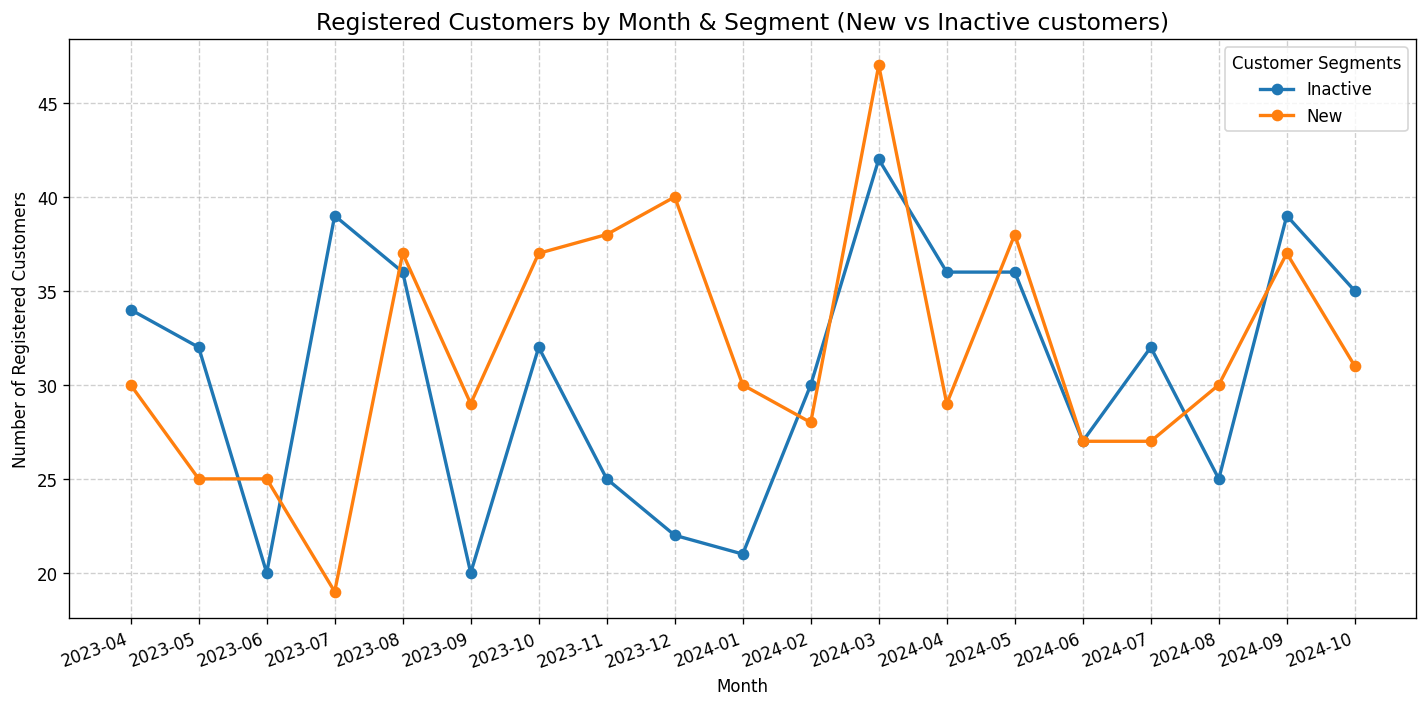

In [15]:
# grouping number of registered customers by Month & customer segments

customer_segments = df.groupby(['Month','customer_segment'])['customer_id'].nunique().reset_index()
customer_segments.rename(columns={'customer_id':'number_of_registered_customers'},inplace=True)
filtered_df1 = customer_segments[customer_segments['customer_segment'].isin(['Inactive','New'])]


plt.figure(figsize=(12,6))

for segment in filtered_df1['customer_segment'].unique():
    subset = filtered_df1[filtered_df1['customer_segment'] == segment]
    plt.plot(
        subset['Month'].astype(str),
        subset['number_of_registered_customers'],
        marker='o',
        linewidth=2,
        label=segment
    )

plt.title("Registered Customers by Month & Segment (New vs Inactive customers)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Registered Customers")
plt.legend(title="Customer Segments")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()



* It is important to further examine the factors that contributed to the sharp difference between inactive customers and new users in July 2023. Having inactive customers higher than customers acquired.

* Its also good to note the surge in customer acquisition observed from August 2023 through January 2024, with the number of inactive customers remained relatively low.

* Interestingly, March 2024 recorded the highest number of new customers, but it also saw the highest count of inactive customers. The trend in new customer acquisition appears to be influenced, at least in part, by the lower numbers in preceding months. This inconsistency mirrored as well in inactive customers raises critical questions about what drives the sporadic shifts in both groups.

  > Building on the earlier observation that March 2024 recorded the highest sales, it is possible that the low customer acquisition in previous months created pressure to attract new customers during the March holiday season. Going forward, it will be important to assess the cost benefit (ROI) of the promotional strategies applied and determine whether they generated higher returns in that period.





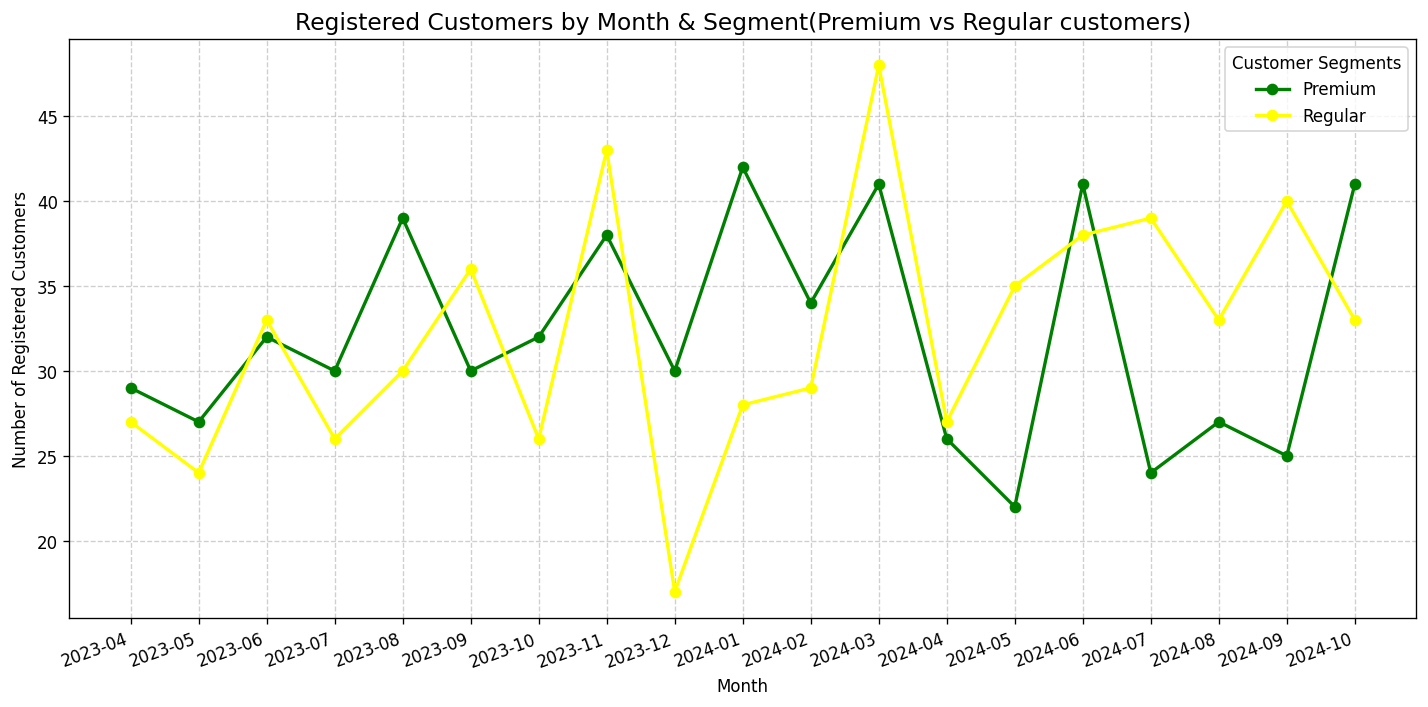

In [16]:

filtered_df2 = customer_segments[customer_segments['customer_segment'].isin(['Premium','Regular'])]

# defining colors for the segments
colors = {'Premium':'green',
         'Regular':'yellow'}

plt.figure(figsize=(12,6))

for segment in filtered_df2['customer_segment'].unique():
    subset = filtered_df2[filtered_df2['customer_segment'] == segment]
    plt.plot(
        subset['Month'].astype(str),
        subset['number_of_registered_customers'],
        marker='o',
        linewidth=2,
        label=segment,
        color = colors[segment]
    )

plt.title("Registered Customers by Month & Segment(Premium vs Regular customers)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Registered Customers")
plt.legend(title="Customer Segments")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()



* A key point of focus is December 2023, which saw a decline in both regular and premium customers, most notably, a sharp drop among regular customers. It will be important to analyze the customer acquisition strategies that drove the rebound in both groups from January to March 2024, and assess whether these methods can be replicated in the subsequent months.

* Premium customer numbers have remained relatively stable, ranging between 22 and 40, whereas regular customers have shown significant volatility throughout the entire period.

### iii)  Average Order Value vs. Customer Acquisition
* does low pricing lead to high number of customers?




In [17]:
x = cust_base_excl[['num_customers', 'avg_order_value']]
correlation = x.corr()
print("Correlation between number of customers and average order value:")
print(correlation)

Correlation between number of customers and average order value:
                 num_customers  avg_order_value
num_customers         1.000000        -0.033043
avg_order_value      -0.033043         1.000000


* The correlation analysis indicates that there is no strong relationship between average order value and the number of customers. The correlation coefficient is weak, close to zero and slightly negative, suggesting an inverse relationship, higher average order values are generally associated with fewer customers.

### iv) Price elasticity:
* Does low pricing leads to high orders, or the opposite that the high pricing leads to high orders

                            OLS Regression Results                            
Dep. Variable:             log_orders   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3387
Date:                Mon, 27 Oct 2025   Prob (F-statistic):              0.561
Time:                        15:18:03   Log-Likelihood:                -3021.4
No. Observations:                2500   AIC:                             6047.
Df Residuals:                    2498   BIC:                             6059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9987      0.189     10.601      0.0

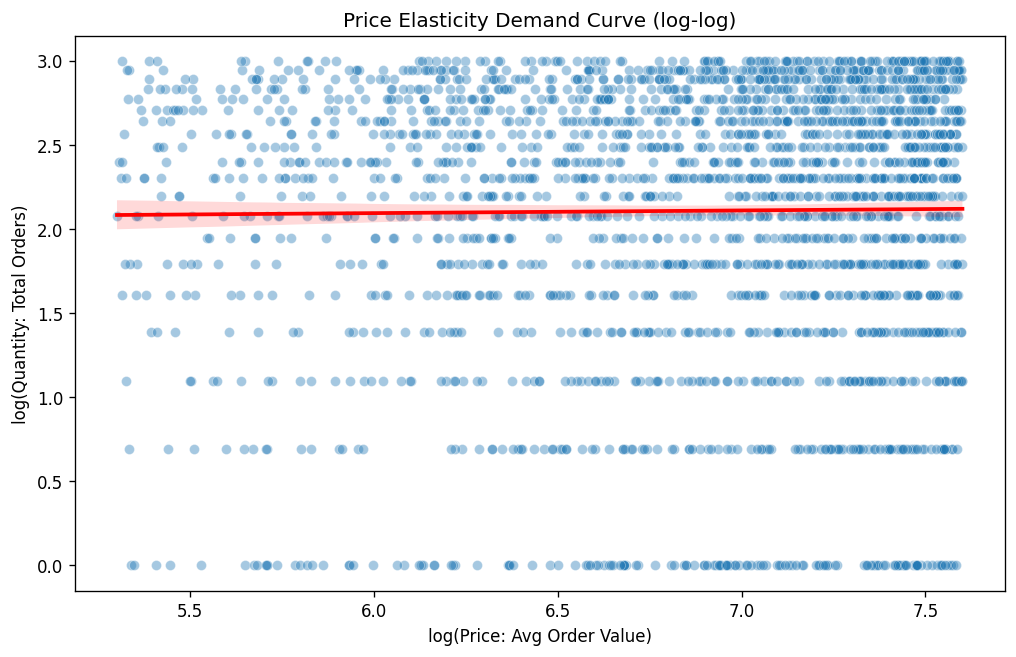

In [18]:
#what's the relationship between the order value and number of customers over time, has low order value led to the influx of customers
# creating a dataset with average pricing and average number of orders
import statsmodels.api as sm
pricing_volume = customer_seg[['avg_order_value','total_orders']]

# Take logs of both variables (drop rows with 0 or negative values if any)
pricing_volume = pricing_volume[(pricing_volume['total_orders'] > 0) &
                                (pricing_volume['avg_order_value'] > 0)]
pricing_volume['log_orders'] = np.log(pricing_volume['total_orders'])
pricing_volume['log_price'] = np.log(pricing_volume['avg_order_value'])

# Run regression: log(Q) ~ log(P)
X = sm.add_constant(pricing_volume['log_price'])
y = pricing_volume['log_orders']
model = sm.OLS(y, X).fit()

# Print summary (elasticity coefficient will be 'log_price')
print(model.summary())

# Get elasticity coefficient
elasticity = model.params['log_price']
print(f"\nEstimated Price Elasticity of Demand: {elasticity:.3f}")

# --- Plotting ---
plt.figure(figsize=(10,6))

# Scatter of log-log data
sns.scatterplot(x=pricing_volume['log_price'], y=pricing_volume['log_orders'], alpha=0.4)

# Regression line
sns.regplot(x='log_price', y='log_orders', data=pricing_volume, scatter=False, color='red')

# Labels
plt.xlabel("log(Price: Avg Order Value)")
plt.ylabel("log(Quantity: Total Orders)")
plt.title("Price Elasticity Demand Curve (log-log)")

plt.show()

While average order value may not be the most accurate measure for assessing the relationship between pricing and order volume, the **estimated Price Elasticity of Demand (PED) is 0.016**. This indicates a slight positive association between price and order volume, which could suggest the presence of premium customers who equate higher prices with better quality, or the influence of promotional offers that drive higher sales volumes.

## 2. **Marketing Strategies and Performance**

In [19]:
# uploading the datasource
market_performance = pd.read_csv("/content/drive/MyDrive/Blinkit datastores/blinkit_marketing_performance.csv")
market_performance.tail()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50
5399,282514,Referral Program,2023-03-17,New Users,Social Media,5967,439,78,1511.93,8322.01,3.08


In [20]:
market_performance.info()
market_performance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


,campaign_id,impressions,clicks,conversions,spend,revenue_generated,roas
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,501315.219074,5460.668519,550.767593,55.192222,3022.192267,5961.742106,2.740711
std,287611.524258,2571.779820,260.080051,26.150173,1148.732680,2322.242911,0.722986
min,243.000000,1002.000000,100.000000,10.000000,1000.630000,2003.100000,1.500000
25%,249200.000000,3231.500000,322.000000,32.000000,2029.070000,3907.240000,2.120000
50%,505012.500000,5457.500000,555.000000,55.000000,3042.485000,5935.940000,2.725000
75%,752219.250000,7676.250000,772.000000,78.000000,4011.572500,7973.712500,3.370000
max,999950.000000,9999.000000,1000.000000,100.000000,4997.550000,9999.540000,4.000000


In [21]:
click_rate = market_performance['clicks'].sum() / market_performance['impressions'].sum()
conversion_rate = market_performance['conversions'].sum() / market_performance['clicks'].sum()
return_on_investment = market_performance['revenue_generated'].sum()/ market_performance['spend'].sum()
print(f"\n The click-through rate and conversion rate: {click_rate:.2%}, {conversion_rate:2%}.")
print(f"While the proportion of revenue generated for the amount spent on ads is {return_on_investment:.2f}. ")


 The click-through rate and conversion rate: 10.09%, 10.020964%.
While the proportion of revenue generated for the amount spent on ads is 1.97. 




* Generally, for the entire period, the Return on Ads spend was 1.97.
* Only 10% carrys over from the number of impressions to actual conversions

In [22]:
popular_campaigns = (
    market_performance
    .groupby(['channel', 'campaign_name'])
    .agg(
        num_campaigns=('campaign_name', 'count'),
        total_clicks=('clicks', 'sum'),
        total_impressions=('impressions', 'sum'),
        total_conversions=('conversions', 'sum'),
        total_revenue=('revenue_generated', 'sum'),
        total_spend=('spend', 'sum')
    )
)

# Compute metrics
popular_campaigns['click_rate'] = (popular_campaigns['total_clicks'] / popular_campaigns['total_impressions']) * 100
popular_campaigns['conversion_rate'] = (popular_campaigns['total_conversions'] / popular_campaigns['total_clicks']) * 100
popular_campaigns['roas'] = popular_campaigns['total_revenue'] / popular_campaigns['total_spend']

# Round values
popular_campaigns = popular_campaigns.round({
    'click_rate': 2,
    'conversion_rate': 2,
    'roas': 2
})

# Sort by channel and ROAS descending
popular_campaigns = popular_campaigns.sort_values(by=['channel', 'roas'], ascending=[True, False])

popular_campaigns


num_campaigns  total_clicks  \
channel      campaign_name                                        
App          App Push Notification            145         75555   
             Referral Program                 136         76832   
             New User Discount                161         88396   
             Festival Offer                   154         80856   
             Flash Sale                       170         95391   
             Membership Drive                 137         73994   
             Email Campaign                   157         83264   
             Weekend Special                  157         78965   
             Category Promotion               157         81722   
Email        Referral Program                 154         85751   
             Festival Offer                   142         77690   
             Weekend Special                  164         87066   
             Email Campaign                   136         80051   
             Membership Drive                 151         88281   
             App Push Notification            148         86772   
             Category Promotion               147         84402   
             Flash Sale                       150         81840   
             New User Discount                151         84204   
SMS          Category Promotion               133         73537   
             Email Campaign                   161         94705   
             App Push Notification            149         81614   
             Festival Offer                   147         80959   
             New User Discount                143         76722   
             Referral Program                 161         87459   
             Weekend Special                  134         72919   
             Membership Drive                 167         96570   
             Flash Sale                       145         79789   
Social Media Flash Sale                       135         75862   
             New User Discount                145         83078   
             Referral Program                 149         79260   
             Membership Drive                 145         76997   
             Weekend Special                  145         84718   
             Email Campaign                   146         80580   
             App Push Notification            158         81892   
             Category Promotion               163         90029   
             Festival Offer                   157         86423   

                                    total_impressions  total_conversions  \
channel      campaign_name                                                 
App          App Push Notification             768649               8012   
             Referral Program                  773972               7457   
             New User Discount                 880617               8687   
             Festival Offer                    860414               8451   
             Flash Sale                        937870               9180   
             Membership Drive                  740450               7547   
             Email Campaign                    860188               8897   
             Weekend Special                   869369               8337   
             Category Promotion                872133               8624   
Email        Referral Program                  833383               8701   
             Festival Offer                    783712               7739   
             Weekend Special                   905792              10001   
             Email Campaign                    745071               7026   
             Membership Drive                  781528               8150   
             App Push Notification             786029               8287   
             Category Promotion                812047               7827   
             Flash Sale                        820790               8423   
             New User Discount               

* The campaigns were run across four channels — Email, SMS, App, and Social Media. This suggests that customer engagement was largely automated, with minimal direct interaction once a campaign was launched.

* The highest Return on Ad Spend (ROAS) per channel was as follows: Email (Referral Program) at 2.21, SMS (Category Promotion) at 2.06, Social Media at 2.10, and App (App Notification) at 1.99.

* At a glance, Email recorded the highest average ROAS among the four channels, a notable insight, considering that marketing emails are often filtered as spam and lack the more direct, personalized engagement offered by App or SMS channels.

Focusing on **March 2024**, which recorded a notable rise in new customer acquisitions and highest sales, I will take a deeper look into this month to identify what worked well and what didn’t. The goal is to determine whether campaigns were fully optimized and which ad initiatives generated strong revenue while maintaining a high ROAS.

In [23]:
# Convert date and extract month
market_performance['date'] = pd.to_datetime(market_performance['date'], errors='coerce')
market_performance['Month'] = market_performance['date'].dt.to_period('M')

# Filter for specific campaigns
festival_campaign = market_performance.loc[

        (market_performance['target_audience']=='New Users') &
    (market_performance['Month'] == '2024-03')
]
# Group by Month and aggregate
return_on_ads_spend = festival_campaign.groupby(['Month','campaign_name']).agg(
    num_campaigns=('campaign_id', 'count'),
    total_revenue=('revenue_generated', 'sum'),
    total_spend=('spend', 'sum'),
    total_impressions = ('impressions','sum'),
    total_clicks = ('clicks','sum'),
    total_conversions = ('conversions','sum')
)

# Compute ROAS
return_on_ads_spend['roas'] = (
    return_on_ads_spend['total_revenue'] / return_on_ads_spend['total_spend']
)
return_on_ads_spend['click_rate'] = (return_on_ads_spend['total_clicks'] / return_on_ads_spend['total_impressions']) * 100
return_on_ads_spend['conversion_rate'] = (return_on_ads_spend['total_conversions'] / return_on_ads_spend['total_clicks']) * 100

# Round for readability
return_on_ads_spend = return_on_ads_spend.round({'roas': 2})

# Display results
# return_on_ads_spend.sort_values(by='roas', ascending=False)
return_on_ads_spend[['num_campaigns','roas','click_rate','conversion_rate','total_revenue']].sort_values(by='roas', ascending=False)

num_campaigns  roas  click_rate  \
Month   campaign_name                                            
2024-03 Flash Sale                         5  3.21    9.665015   
        App Push Notification              7  2.14   13.361368   
        Weekend Special                    7  1.95   10.889744   
        New User Discount                 10  1.86    7.687611   
        Category Promotion                10  1.83    9.500640   
        Festival Offer                    10  1.79    9.893946   
        Email Campaign                     9  1.72   10.472998   
        Referral Program                   6  1.59    9.646446   
        Membership Drive                   6  1.24    7.266724   

                               conversion_rate  total_revenue  
Month   campaign_name                                          
2024-03 Flash Sale                    7.574598       34831.77  
        App Push Notification        11.293309       51302.84  
        Weekend Special               9.909910       51630.96  
        New User Discount            13.742479       61387.85  
        Category Promotion           11.763573       59670.35  
        Festival Offer               10.051497       68373.86  
        Email Campaign                8.796710       42535.54  
        Referral Program              8.719136       35473.26  
        Membership Drive             14.381667       26979.77

**Campaign Insights and Recommendations for New Customers - March 2024**
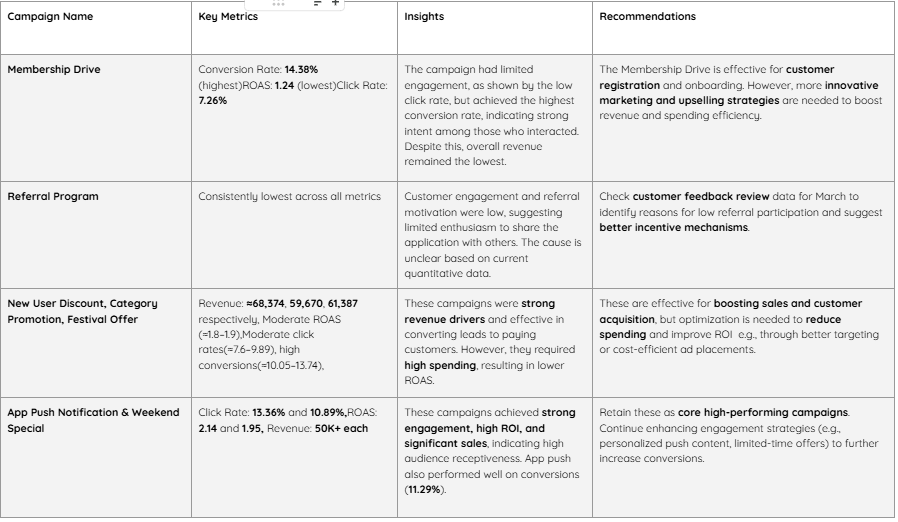

* Referring back to the earlier graph showing the trend of new and inactive customers over time, there was a notable surge of inactive customers between February and March 2024. This period warrants closer examination to identify which campaigns recorded the highest conversion rates and how their revenues ranked in comparison to other months.

In [53]:
# filtering inactive customers for the month of February and March 2025
inactive_customers_campaign = market_performance.loc[
    (market_performance['target_audience'] == 'Inactive') &
    (market_performance['date'] >= '2024-02-01') &
    (market_performance['date'] <= '2024-03-31')]
# Grouping by Month and campaign

return_on_ads_spend = inactive_customers_campaign.groupby(['Month','campaign_name']).agg(
    total_revenue = ('revenue_generated','sum'),
    total_spend = ('spend','sum'),
    total_impressions = ('impressions','sum'),
    total_clicks = ('clicks','sum'),
    total_conversions = ('conversions','sum')
)

# computing performance metrics
return_on_ads_spend['roas'] = return_on_ads_spend['total_revenue']/return_on_ads_spend['total_spend']
return_on_ads_spend['conversion_rate'] = return_on_ads_spend['total_clicks']/return_on_ads_spend['total_conversions']

# rank campaigns for each month by total revenue
return_on_ads_spend['revenue_rank'] = return_on_ads_spend.groupby('Month')['total_revenue'].rank(ascending=False,method='dense')
# rounding off for readability
return_on_ads_spend = return_on_ads_spend.round({'roas':2,'coversion_rate':2})

# filter to show only campaigns that had the highest conversions rate per month

top_conversion_campaigns = return_on_ads_spend.loc[return_on_ads_spend.groupby('Month')['conversion_rate'].idxmax()]

# show results by month and revenue rank
top_conversion_campaigns = top_conversion_campaigns.sort_values(by=['Month','revenue_rank'])

# displaying key metrics
top_conversion_campaigns[['conversion_rate','total_spend','total_revenue','revenue_rank','num_campaigns']]

conversion_rate  total_spend  total_revenue  \
Month   campaign_name                                                        
2024-02 Festival Offer                8.927739     21576.59       46456.51   
        Category Promotion            8.678899     17597.61       44303.88   
        Referral Program             10.081967     21554.93       41279.20   
        Email Campaign                8.945170     14922.14       39907.41   
        Weekend Special               6.000000      8120.88       30880.01   
        Membership Drive             11.769231     15682.14       30247.16   
        App Push Notification         7.430693     13989.79       28033.29   
        Flash Sale                    8.685921     21252.88       26860.63   
        New User Discount             8.986577      6929.09       17539.97   
2024-03 Weekend Special               9.362981     46863.56       86423.60   
        Category Promotion           10.554393     27430.01       52726.77   
        Festival Offer               13.273481     26603.67       47697.75   
        App Push Notification        10.505695     15307.67       46023.47   
        Membership Drive             14.711656     19999.55       44931.86   
        Flash Sale                   13.330073     26872.91       42279.76   
        Email Campaign                6.595156     13845.31       32932.11   
        New User Discount             7.112583     18100.63       29027.80   
        Referral Program             11.277778     16944.67       23333.25   

                               revenue_rank  num_campaigns  
Month   campaign_name                                       
2024-02 Festival Offer                  1.0              8  
        Category Promotion              2.0              6  
        Referral Program                3.0              7  
        Email Campaign                  4.0              7  
        Weekend Special                 5.0              4  
        Membership Drive                6.0              5  
        App Push Notification           7.0              5  
        Flash Sale                      8.0              5  
        New User Discount               9.0              3  
2024-03 Weekend Special                 1.0             14  
        Category Promotion              2.0              8  
        Festival Offer                  3.0              8  
        App Push Notification           4.0              7  
        Membership Drive                5.0              7  
        Flash Sale                      6.0              9  
        Email Campaign                  7.0              5  
        New User Discount               8.0              5  
        Referral Program                9.0              5